In [1]:
%matplotlib inline
import spikeinterface.full as si

import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path


c:\Users\stakahas.DESKTOP-JMVVEDC\.conda\envs\si_env\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [96]:
# base_folder = Path('O:\\seaturtle\\2023\\combine\\alpha\\20230820')

# sg_folder=base_folder / '20230820_102752.kilosort'
# sg_file=sg_folder / '20230820_102752.probe1.dat'

# sg_file=base_folder / 'traces_cached_seg0.raw'

# base_folder = Path('J:\\seaTurtle')
# base_folder = Path('K:\\combine\\beta\\20230820')
# sg_folder=base_folder / '20230820_151453.kilosort'
# sg_file=sg_folder / '20230820_151453.probe1.dat'

# print(sg_file)

O:\seaturtle\2023\combine\alpha\20230820\20230820_102752.kilosort\20230820_102752.probe1.dat


In [149]:
def construct_sg_file(folder_path):
    base_folder = Path(folder_path)
    # Correctly append only the probe file to the directory without repeating the base folder name
    sg_file = base_folder / f'{base_folder.stem}.probe1.dat'
    return sg_file

folder_path = r'O:\seaturtle\2023\combine\gamma\20230821-1\20230821_134924.kilosort'
sg_file = construct_sg_file(folder_path)
print(sg_file)

O:\seaturtle\2023\combine\beta\20230820\20230820_151453.kilosort\20230820_151453.probe1.dat


In [150]:
rec=si.BinaryRecordingExtractor(sg_file,sampling_frequency=30e3,num_channels=384,dtype='int16',gain_to_uV=2.34375,offset_to_uV=0);

In [153]:
from probeinterface import generate_multi_columns_probe
import numpy as np
import matplotlib.pyplot as plt
import scipy

from probeinterface import Probe, ProbeGroup
from probeinterface.plotting import plot_probe, plot_probe_group

c:\Users\stakahas.DESKTOP-JMVVEDC\.conda\envs\si_env\lib\site-packages\spikeinterface\widgets\widget_list.py:148: UserWarning: plot_timeseries() is now plot_traces()
  warnings.warn("plot_timeseries() is now plot_traces()")


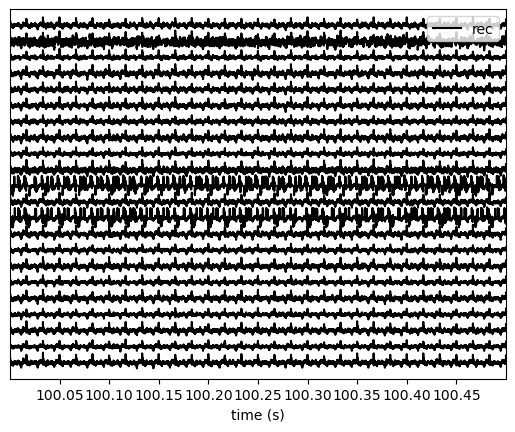

In [152]:
si.plot_timeseries(rec, time_range=(100, 100.5), channel_ids=rec.channel_ids[8:30])

(<matplotlib.collections.PolyCollection at 0x21e8d954b80>,
 <matplotlib.collections.PolyCollection at 0x21e8d91a640>)

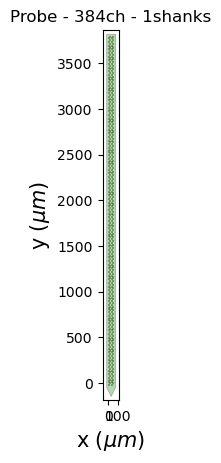

In [154]:
multi_columns = generate_multi_columns_probe(num_columns=4,
                                             num_contact_per_column=[96, 96, 96, 96],
                                             xpitch=16, ypitch=40,
                                             y_shift_per_column=[-20, 0, -20, 0],
                                             contact_shapes='square', contact_shape_params={'width': 12})

positions=multi_columns.contact_positions

n = 384
xpitch=16;
ypitch=40;
y_shift_per_column=-20;

for i in range(int(n/4)):
    positions[i*4+0,0]=xpitch*0;
    positions[i*4+1,0]=xpitch*2;
    positions[i*4+2,0]=xpitch*1;
    positions[i*4+3,0]=xpitch*3;
    positions[i*4+0,1]=y_shift_per_column+ypitch*i;
    positions[i*4+1,1]=y_shift_per_column+ypitch*(i);
    positions[i*4+2,1]=y_shift_per_column+ypitch*(i+.5);
    positions[i*4+3,1]=y_shift_per_column+ypitch*(i+.5);

# print(positions)

plot_probe(multi_columns)

In [23]:
# import scipy
# chan_path=sg_folder / 'chanmap.mat'
# cmap = scipy.io.loadmat(chan_path)
# channel_locs = np.hstack((cmap['xcoords'], cmap['ycoords']))
# print(np.arange(channel_locs.shape[0]))
# rec.set_channel_locations(channel_locs)
# multi_columns.set_device_channel_indices(np.arange(channel_locs.shape[0]))
# manually insert the channel range

In [155]:
channel_locs =np.arange(1434,1050,-1)
channel_locs =np.arange(1384,1000,-1)
print(channel_locs)
rec.set_channel_locations(channel_locs)
print(np.arange(channel_locs.shape[0]))
print(channel_locs)
multi_columns.set_device_channel_indices(np.arange(channel_locs.shape[0]))
print(multi_columns)

[1384 1383 1382 1381 1380 1379 1378 1377 1376 1375 1374 1373 1372 1371
 1370 1369 1368 1367 1366 1365 1364 1363 1362 1361 1360 1359 1358 1357
 1356 1355 1354 1353 1352 1351 1350 1349 1348 1347 1346 1345 1344 1343
 1342 1341 1340 1339 1338 1337 1336 1335 1334 1333 1332 1331 1330 1329
 1328 1327 1326 1325 1324 1323 1322 1321 1320 1319 1318 1317 1316 1315
 1314 1313 1312 1311 1310 1309 1308 1307 1306 1305 1304 1303 1302 1301
 1300 1299 1298 1297 1296 1295 1294 1293 1292 1291 1290 1289 1288 1287
 1286 1285 1284 1283 1282 1281 1280 1279 1278 1277 1276 1275 1274 1273
 1272 1271 1270 1269 1268 1267 1266 1265 1264 1263 1262 1261 1260 1259
 1258 1257 1256 1255 1254 1253 1252 1251 1250 1249 1248 1247 1246 1245
 1244 1243 1242 1241 1240 1239 1238 1237 1236 1235 1234 1233 1232 1231
 1230 1229 1228 1227 1226 1225 1224 1223 1222 1221 1220 1219 1218 1217
 1216 1215 1214 1213 1212 1211 1210 1209 1208 1207 1206 1205 1204 1203
 1202 1201 1200 1199 1198 1197 1196 1195 1194 1193 1192 1191 1190 1189
 1188 

In [156]:
from spikeinterface.extractors.neuropixels_utils import get_neuropixels_sample_shifts

rec.set_probe(multi_columns, in_place=True)
# Set inter sample shift            
inter_sample_shifts = get_neuropixels_sample_shifts(384, 12)

In [157]:
rec.get_probe().to_dataframe()

,x,y,contact_shapes,width,shank_ids,contact_ids
0,0.0,-20.0,square,12.0,,0
1,32.0,-20.0,square,12.0,,1
2,16.0,0.0,square,12.0,,2
3,48.0,0.0,square,12.0,,3
4,0.0,20.0,square,12.0,,4
...,...,...,...,...,...,...
379,48.0,3760.0,square,12.0,,379
380,0.0,3780.0,square,12.0,,380
381,32.0,3780.0,square,12.0,,381
382,16.0,3800.0,square,12.0,,382


In [158]:
rec1 = si.highpass_filter(rec, freq_min=400.)
rec2 = si.phase_shift(rec1, inter_sample_shift=inter_sample_shifts)

# common_referencing is implemented in kilosort
# rec3 = si.common_reference(rec2, operator="median", reference="global")

# rec_f = si.bandpass_filter(rec, freq_min=300, freq_max=9000)
# bad_channel_ids, channel_labels = si.detect_bad_channels(rec_f, method='coherence+psd')
# print('bad_channel_ids', bad_channel_ids)
# print('channel_labels', channel_labels)
# rec2 = rec2.remove_channels(bad_channel_ids)

In [12]:
# si.plot_timeseries(rec2, time_range=(100.1, 100.15), channel_ids=rec.channel_ids[8:30])

In [13]:
# noise_levels_microV = si.get_noise_levels(rec2, return_scaled=True)
# noise_levels_microV
# fig, ax = plt.subplots()
# _ = ax.hist(noise_levels_microV, bins=np.arange(5, 400, 2.5))
# ax.set_xlabel('noise  [microV]')

In [14]:
# fig, ax = plt.subplots(figsize=(20, 10))
# some_chans = rec.channel_ids[[1, 350, 300, ]]
# si.plot_timeseries({'filter':rec, 'cmr': rec3}, backend='matplotlib', mode='line', ax=ax, channel_ids=some_chans)

In [17]:
# si.get_default_sorter_params('kilosort3')

{'detect_threshold': 6,
 'projection_threshold': [9, 9],
 'preclust_threshold': 8,
 'car': True,
 'minFR': 0.2,
 'minfr_goodchannels': 0.2,
 'nblocks': 5,
 'sig': 20,
 'freq_min': 300,
 'sigmaMask': 30,
 'nPCs': 3,
 'ntbuff': 64,
 'nfilt_factor': 4,
 'do_correction': True,
 'NT': None,
 'wave_length': 61,
 'keep_good_only': False,
 'n_jobs': 64,
 'chunk_duration': '1s',
 'progress_bar': True}

In [159]:
job_kwargs = dict(n_jobs=10, chunk_duration='1s', progress_bar=True)
st_folder=Path(folder_path) / 'stFolder'
print(st_folder)
rec2 = rec2.save(folder=st_folder, **job_kwargs)

# cachedfolder=Path("j:/test-docker-folder2");
# rec2 = si.load_extractor(cachedfolder)

O:\seaturtle\2023\combine\beta\20230820\20230820_151453.kilosort\stFolder
write_binary_recording with n_jobs = 10 and chunk_size = 30000


write_binary_recording:   0%|          | 0/10285 [00:00<?, ?it/s]

In [1]:
# should perform kilosort3 in Matlab
#
# from spikeinterface.sorters import run_sorter, installed_sorters
# sorting = run_sorter('kilosort3', recording=rec2,
#                      output_folder="j:/tmp/kilosort3", docker_image=False, verbose=True, n_jobs=60)
# # sorting = run_sorter('mountainsort4', recording=rec2,
#                      output_folder="j:/tmp/mountainsort4", docker_image=True, verbose=True)

In [ ]:
# base_folder = Path('J:\\')
# ks_folder=base_folder / 'tmpFolder'
# phy_file=ks_folder / 'kilosort3'
# import spikeinterface.extractors as se
# phy_file
# sorting=se.read_phy(phy_file)



In [ ]:
#conda activate ecephys
#
# scripts exist in C:\Users\stakahas.DESKTOP-JMVVEDC\github\ecephys_spike_sorting\ecephys_spike_sorting\scripts
#remove duplicated spikes
#python -m ecephys_spike_sorting.modules.kilosort_postprocessing --input_json ks-pp.txt
#noise templates
#python -m ecephys_spike_sorting.modules.noise_templates --input_json noiseTemp.txt
#calculate quality metrics
#python -m ecephys_spike_sorting.modules.quality_metrics --input_json qualitym.txt
#
#move processed phy-folder to ??
#phy template-gui params.py
# In trouble, .phy folder should be renamed.

In [ ]:
# rec2.annotate(is_filtered=True)
# sorting2=si.remove_duplicated_spikes(sorting,censored_period_ms=.4,method='keep_first')

In [ ]:
# job_kwargs = dict(n_jobs=40, chunk_duration='1s', progress_bar=True)
# we = si.extract_waveforms(rec2, sorting, folder=base_folder / 'waveforms_kilosort3',
#                           sparse=True, max_spikes_per_unit=500, ms_before=1.5,ms_after=2.,
#                           **job_kwargs)

In [ ]:
# sorting2=si.remove_redundant_units(we,align=True,**job_kwargs)